In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.filters as flt
import matplotlib as mpl
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
#from lecturesupport import plotsupport as ps
import pandas as pd
from sklearn.datasets import make_blobs
import scipy.stats as stats
import astropy.io.fits as fits
import skimage.io as io
%matplotlib inline


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'png')
#plt.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 150

# Load the data

In [27]:
img=io.imread('../data/spots/mixture12_00001.png')
orig= fits.getdata('../data/spots/mixture12_00001.fits')

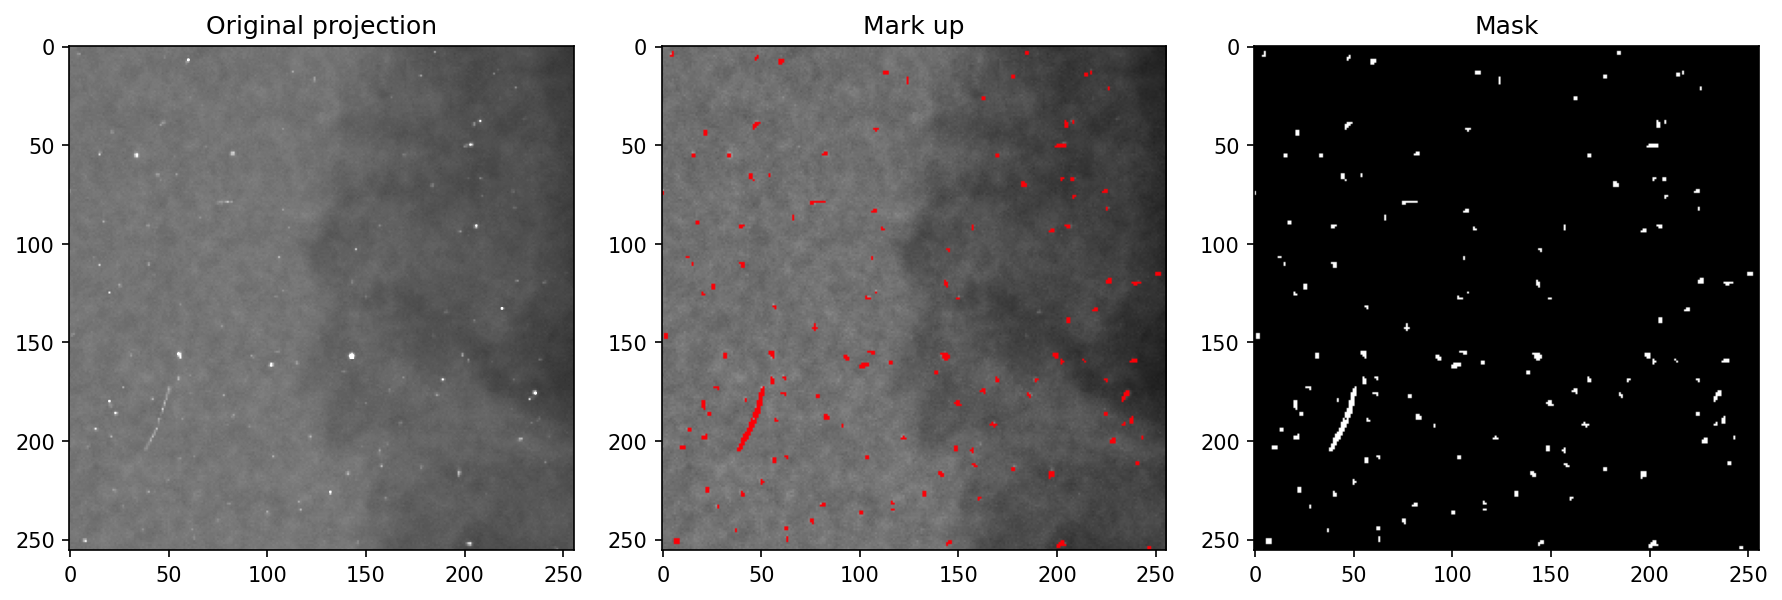

In [28]:
fig, ax = plt.subplots(1,3,figsize=(12,6))
r=600
c=600
w=256
mask=(img[:,:,1]==0)
ax[0].imshow(orig[r:(r+w),c:(c+w)],vmin=0, vmax=4000,cmap='gray'), ax[0].set_title('Original projection')
ax[1].imshow(img[r:(r+w),c:(c+w)]), ax[1].set_title('Mark up')
ax[2].imshow(mask[r:(r+w),c:(c+w)],cmap='gray'),ax[2].set_title('Mask');
plt.tight_layout()
plt.savefig('../lecture/figures/markedspots.svg')
plt.savefig('../lecture/figures/markedspots.pdf')

In [29]:
=plt.hist(orig[mask].ravel(),bins=256);

SyntaxError: invalid syntax (<ipython-input-29-2fe95b37310f>, line 1)

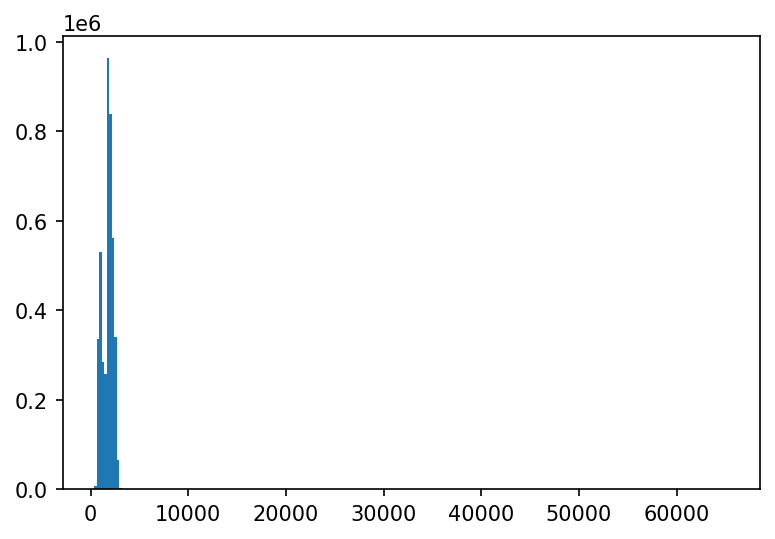

In [30]:
h=plt.hist(orig.ravel(),bins=256);

In [31]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `

In [32]:
hspots,axspots=np.histogram(orig[mask].ravel(),bins=256)
hall,axall=np.histogram(orig.ravel(),bins=256)

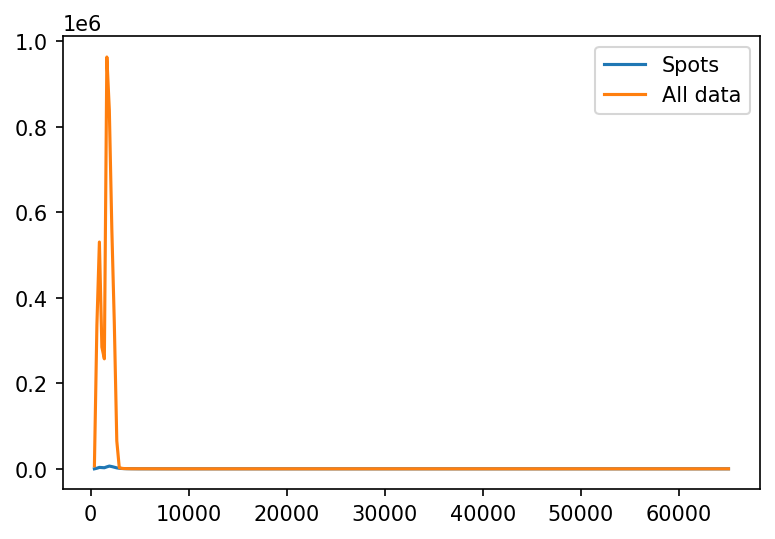

In [33]:
plt.plot(axspots[:-1],hspots,label='Spots')
plt.plot(axall[:-1],hall,label='All data')
plt.legend();


In [50]:
selem = np.ones([7,7])
mimg = flt.median(orig,selem=selem)

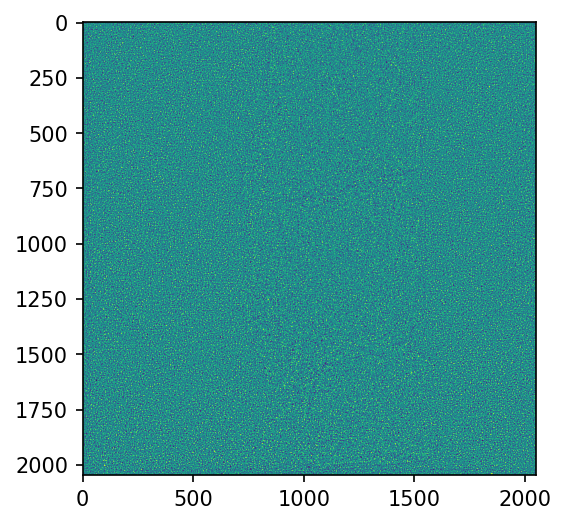

In [51]:
d=np.abs(orig-mimg)
plt.imshow(d)

In [52]:
hd,axd=np.histogram(d[mask].ravel(),bins=256)

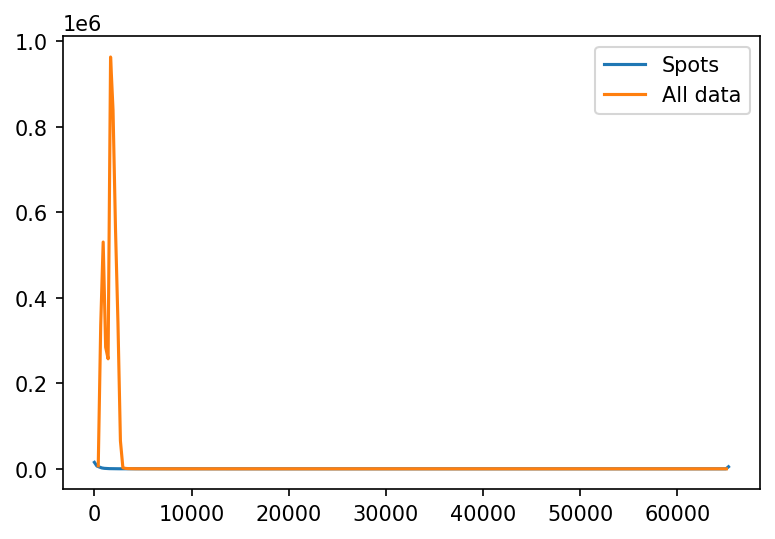

In [54]:
plt.plot(axd[:-1],hd,label='Spots')
plt.plot(axall[:-1],hall,label='All data')
plt.legend();

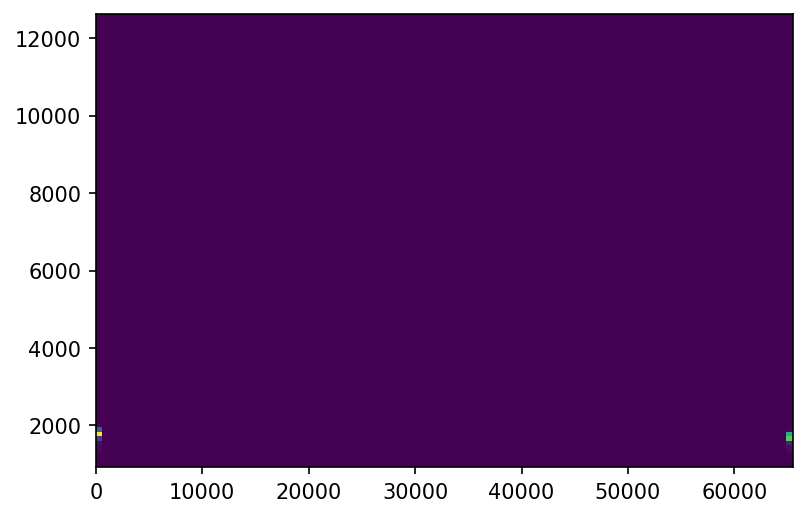

In [62]:
h,x,y,u=plt.hist2d(d[:512,:512].ravel(),orig[:512,:512].ravel(), bins=100);

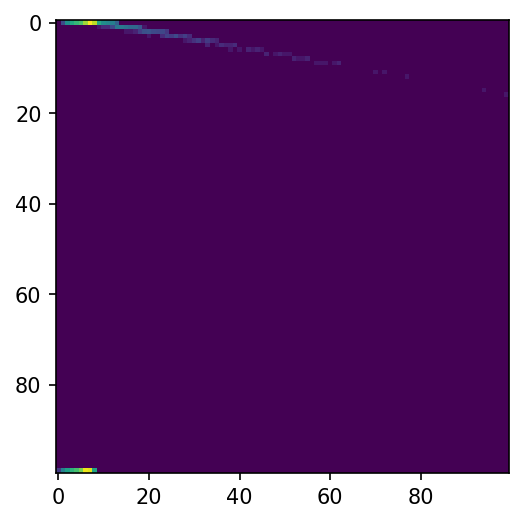

In [63]:
plt.imshow(np.log(h+1))

In [58]:
h

(array([[  0.,  12., 274., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  6., 141., 652., ...,   0.,   0.,   0.]]),
 array([    0.  ,   655.35,  1310.7 ,  1966.05,  2621.4 ,  3276.75,
         3932.1 ,  4587.45,  5242.8 ,  5898.15,  6553.5 ,  7208.85,
         7864.2 ,  8519.55,  9174.9 ,  9830.25, 10485.6 , 11140.95,
        11796.3 , 12451.65, 13107.  , 13762.35, 14417.7 , 15073.05,
        15728.4 , 16383.75, 17039.1 , 17694.45, 18349.8 , 19005.15,
        19660.5 , 20315.85, 20971.2 , 21626.55, 22281.9 , 22937.25,
        23592.6 , 24247.95, 24903.3 , 25558.65, 26214.  , 26869.35,
        27524.7 , 28180.05, 28835.4 , 29490.75, 30146.1 , 30801.45,
        31456.8 , 32112.15, 32767.5 , 33422.85, 34078.2 , 34733.55,
        35388.9 , 36044.25, 36699.6 , 37354.95, 38010.3 , 38665.65,